# Lecture 13 - PCR and PLS
## CMSE 381 - SS 2024




In [2]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

import seaborn as sns

# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# 1. PCA on Penguins
![Palmer Penguins Picture](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

*Artwork by @allison_horst*


For this lab, we are going to again use the <a href = "https://allisonhorst.github.io/palmerpenguins/">Palmer Penguins</a> data set by Allison Horst, Alison Hill, and Kristen Gorman. You should have done this in a previous notebook, but if you don't have the package installed to get the data, you can run 
```
pip install palmerpenguins
```
to have access to the data. 

In [3]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()

#Shuffle the data
#penguins = penguins.sample(frac=1)
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Before we get to the full version, let's just take a look at two of the columns: flipper length and bill length. A nice thing we can do is to also color the data by the species label. 

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

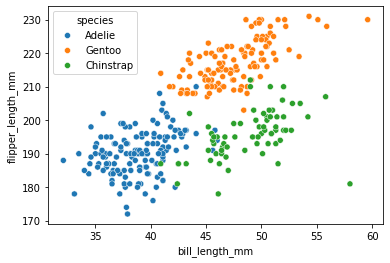

In [4]:
sns.scatterplot(x = penguins.bill_length_mm, 
                y = penguins.flipper_length_mm, 
                hue = penguins.species)

Before we get to it, we're going to just work with the columns that are numeric.  

In [5]:
penguins_num = penguins.select_dtypes(np.number)
penguins_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
4,36.7,19.3,193.0,3450.0,2007
5,39.3,20.6,190.0,3650.0,2007


We normalize the data to make the visualization easier (meaning shifting our data to have mean 0 in every column, and have standard deviation 1). 

In [6]:
p_normalized = (penguins_num - penguins_num.mean())/penguins_num.std()
p_normalized.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,-0.894695,0.779559,-1.424608,-0.567621,-1.281813
1,-0.821552,0.119404,-1.067867,-0.505525,-1.281813
2,-0.675264,0.424091,-0.425733,-1.188572,-1.281813
4,-1.333559,1.084246,-0.568429,-0.940192,-1.281813
5,-0.858123,1.744400,-0.782474,-0.691811,-1.281813


## PCA with just two input columns

To try to draw pictures similar to what we just saw on the slides, we'll first focus on two of the columns. 

In [7]:
penguins_subset2 = p_normalized[['bill_length_mm', 'flipper_length_mm']]
penguins_subset2

,bill_length_mm,flipper_length_mm
0,-0.894695,-1.424608
1,-0.821552,-1.067867
2,-0.675264,-0.425733
4,-1.333559,-0.568429
5,-0.858123,-0.782474
...,...,...
339,2.159064,0.430446
340,-0.090112,0.073705
341,1.025333,-0.568429
342,1.244765,0.644491


We run PCA using the `PCA` command from `scikitlearn`.

In [8]:
from sklearn.decomposition import PCA

In [9]:
# Set up the PCA object
pca = PCA(n_components=2)

# Fit it using our data
pca.fit(penguins_subset2.values)

PCA(n_components=2)

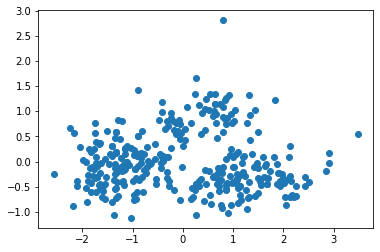

In [10]:
pca_df = pca.fit_transform(penguins_subset2.values)
plt.scatter(pca_df[:,0], pca_df[:,1])

The `pca.components_` store information about the lines we are going to project our data onto. Specifically, each row gives us one of these lines.

In [11]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

(-2.4261469084390344,
 3.1053642574684943,
 -2.2772189966421617,
 3.254292169265367)

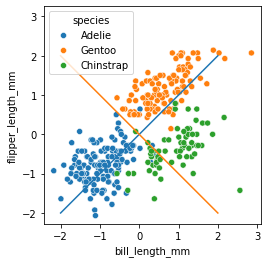

In [12]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)

for i, comp in enumerate(pca.components_):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))
    
plt.axis('square')

A common way to look at the relative importance of the PC's is to draw these components as vectors with length based on the explained variance. 

In [13]:
pca.explained_variance_

array([1.65309564, 0.34690436])

(-2.4261469084390344,
 3.1053642574684943,
 -2.2772189966421617,
 3.254292169265367)

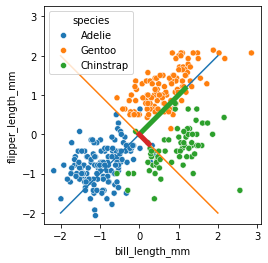

In [14]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))
    
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )

plt.axis('square')

The next important part are the PC's, which we can get from the `pca` object as follows. I'm going to put them in a dataframe to make drawing and visualization easier. Basically, $PC_1$ is our $Z_1$ in the slides, and $PC_2$ is the $Z_2$.

In [15]:
# The transform function takes in bill,flipper data points, 
# and returns a PC1,PC2 coordinate for each one. 
penguins_pca = pca.fit_transform(penguins_subset2)
penguins_pca = pd.DataFrame(data = penguins_pca, columns = ['PC1', 'PC2'])
penguins_pca.shape

(333, 2)

This is the scatterplot of the data points transformed into the PC space. 

<Axes: xlabel='PC1', ylabel='PC2'>

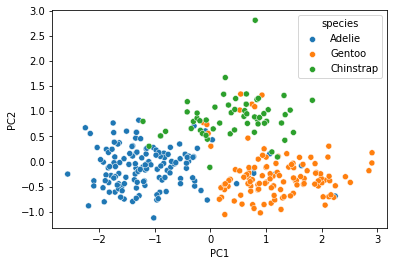

In [16]:
sns.scatterplot(data = penguins_pca, x = 'PC1', y = 'PC2',hue = penguins.species)

&#9989; **<font color=red>Do this:</font>** What are the PC scores for the first data point (index 0)?  


In [23]:
# Your answer here
a,b = penguins_subset2.iloc[0,:]
c,d = penguins_pca.iloc[0,:]

score = a*c + b*d
score

0.9334891457418246

## Penguins PCA with all columns

We used only two columns above for visualization, but we can instead use all the input columns to run our PCA. 

In [24]:
penguins_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
4,36.7,19.3,193.0,3450.0,2007
5,39.3,20.6,190.0,3650.0,2007


In [25]:
pca = PCA(n_components=4)
penguins_pca_all = pca.fit_transform(penguins_num)
penguins_pca_all = pd.DataFrame(data = penguins_pca_all, 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4'])
penguins_pca_all

,PC1,PC2,PC3,PC4
0,-457.325096,13.376298,1.247904,-0.376474
1,-407.252228,9.205245,-0.032667,-1.090217
2,-957.044699,-8.128321,-2.491467,0.720823
3,-757.115824,-1.838910,-4.880569,2.073668
4,-557.177325,3.416994,-1.129267,2.629297
...,...,...,...,...
328,-206.895442,-12.507424,9.424523,2.201716
329,-806.944216,-13.443905,-1.490242,1.436737
330,-432.103210,-0.999033,7.386135,-0.375741
331,-106.881363,-12.241310,3.792123,2.298703


&#9989; **<font color=red>Do this:</font>** Make a scatter plot of PC1 and PC2 using this new model, and again color the points by `penguins.species`. What do you notice about how the PC plot has changed from the previous setting? 

<Axes: xlabel='PC1', ylabel='PC2'>

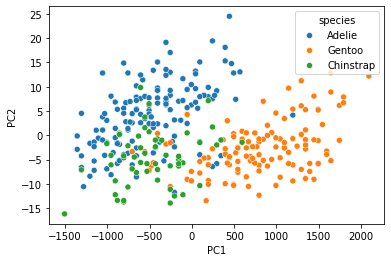

In [26]:
# your code here
sns.scatterplot(data = penguins_pca_all, x = 'PC1', y = 'PC2',hue = penguins.species)

This overlaps more and is m

# Principal Component Regression 

Ok, let's take a hard left turn and go try out some of the dimension reduction methods from Section 6.3. `Scikit-learn` doesn't have a built in function to do PCR (aka PCA and then regression) but it's just as easy for us to do it ourselves. 

PCR is a supervised learning problem, so unlike PCA, it requires the exitence of the response variable. 

Let us shift gear and try to predict ``flipper_length`` from the rest of the numerical variables 



In [ ]:
y = penguins['flipper_length_mm']
X = penguins_num.drop(columns=['flipper_length_mm'])

For the new dataframe `X`, let us calculate its PCs. 

In [ ]:
print(X.shape)
pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

From the output of the above cell, we see that just doing PCA does not automatically reduce the number of predictors. We actually have to manually reduce the predictors by picking how many PCs we want to use in the regression. Now, say we want to reduce the number of predictors from 4 to 3, then I would use only the first 3 PCs for regression.

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_pca[:,:3], y)
mean_squared_error(y,regr.predict(X_pca[:,:3]))

&#9989; **<font color=red>Do this:</font>** My code above contains the rookie mistake of only reporting training error. Write modified code to return the 10-fold CV error of linear regression on the first 3 PCs.

In [ ]:
# Your code here #



# You'll probably want this....
from sklearn.model_selection import cross_val_score


